In [1]:
import pandas as pd
from io import StringIO
#Ucitavanje podataka
data1 = pd.read_csv("podaci/d10800_BS1_JoinedTrans.csv");
data1.shape
data1.head()

,src_file,row_id,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,...,hg38_TBC1D10C,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36
0,BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-...,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-...,13,0,0,0,3,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-...,19,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2,0,3
3,BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-...,21,0,0,0,0,0,3,0,0,...,0,0,0,0,3,0,0,3,0,0
4,BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-...,26,0,0,0,0,0,3,0,0,...,3,0,0,0,0,0,0,0,0,0


In [3]:
print(data1.shape)


(13183, 10802)


In [4]:
#Za proveru ispravnosti formata datoteke
with open("podaci/d10800_BS2_JoinedTrans.csv", 'r') as file:
    f = next(file)
    s=next(file)
    t=next(file)
    f=next(file)
    g=next(file)
    l=next(file)
    print(len(f.split(',')))
    print(len(s.split(',')))
    print(len(t.split(',')))
    print(len(f.split(',')))
    print(len(g.split(',')))
    print(len(l.split(',')))



2691
2693
2717
2691
10802
10802


In [5]:
with open("podaci/d10800_BS2_JoinedTrans.csv", 'r') as file:
    first_line = next(file).strip()
    second_line = next(file).strip()
    third_line = next(file).strip()
    fourth_line = next(file).strip()

    # Kombinovanje redova kako bismo dobili potpune nazive 
    combined_header = f"{first_line}{second_line}{third_line}{fourth_line}"

    # Čitanje ostalih linija i njihovo spajanje
    data_lines = [line.strip() for line in file]

# Kombinovanje svih linija u jedan niz znakova
combined_data = '\n'.join([combined_header] + data_lines)

data2 = pd.read_csv(StringIO(combined_data))
print("Spojeni podaci shape:", data2.shape)
print(data2.head())


Spojeni podaci shape: (12146, 10802)
                                         src_file  row_id  hg38_ASF1A  \
0  BS2__BC__B_cells_B_V2-Brep1-BROADS2-CHECKED-VB       1           0   
1  BS2__BC__B_cells_B_V2-Brep1-BROADS2-CHECKED-VB       2           0   
2  BS2__BC__B_cells_B_V2-Brep1-BROADS2-CHECKED-VB       3           1   
3  BS2__BC__B_cells_B_V2-Brep1-BROADS2-CHECKED-VB       4           0   
4  BS2__BC__B_cells_B_V2-Brep1-BROADS2-CHECKED-VB       5           0   

   hg38_CCT7  hg38_EPOR  hg38_NECAP2  hg38_LRRC8A  hg38_NDUFS8  hg38_MRPL22  \
0          0          0            0            0            0            0   
1          0          0            0            0            0            0   
2          1          0            1            1            0            0   
3          0          0            0            0            0            0   
4          0          0            0            0            0            0   

   hg38_HIST1H2BC  ...  hg38_TBC1D10C  hg38_TMEM1

In [6]:
import numpy as np
# Provera null vrednosti u prvoj datoteci
null_values_data1 = data1.isna().sum()
print("Null vrednosti u datoteci 1:")
print(null_values_data1.sum())

# Provera null vrednosti u drugoj datoteci
null_values_data2 = data2.isna().sum()
print("\nNull vrednosti u datoteci 2:")
print(null_values_data2.sum())

Null vrednosti u datoteci 1:
0

Null vrednosti u datoteci 2:
0


In [7]:
#Nemamo null vrednosti, tako da mozemo analizirati podatke
unique_cell_types1 = data1["src_file"].unique()
print("Jedinstveni tipovi ćelija u prvoj datoteci:")
print(unique_cell_types1)

unique_cell_types2 = data2["src_file"].unique()
print("Jedinstveni tipovi ćelija u drugoj datoteci:")
print(unique_cell_types1)

Jedinstveni tipovi ćelija u prvoj datoteci:
['BS1__BC__1-OK-B_cells_Bmemory-580-BOS-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bmemory-580-NYC-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bmemory-860-BOS-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bmemory-860-NYC-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bnaive-580-BOS-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bnaive-580-NYC-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bnaive-860-BOS-BROADS1-CHECKED_VB'
 'BS1__BC__1-OK-B_cells_Bnaive-860-NYC-BROADS1-CHECKED_VB'
 'BS1__DC__1-OK-DC_cells_ALL-580-BOS-BROADS1-CHECKED_VB'
 'BS1__DC__1-OK-DC_cells_ALL-580-NYC-BROADS1-CHECKED_VB'
 'BS1__DC__1-OK-DC_cells_ALL-860-BOS-BROADS1-CHECKED_VB'
 'BS1__DC__1-OK-DC_cells_ALL-860-NYC-BROADS1-CHECKED_VB'
 'BS1__MC__1-OK-Monocytes_CD14+M-580-BOS-BROADS1-CHECKED_VB'
 'BS1__MC__1-OK-Monocytes_CD14+M-580-NYC-BROADS1-CHECKED_VB'
 'BS1__MC__1-OK-Monocytes_CD14+M-860-BOS-BROADS1-CHECKED_VB'
 'BS1__MC__1-OK-Monocytes_CD14+M-860-NYC-BROADS1-CHECKED_VB'
 'BS1__M

In [8]:
#Prikaz broja podataka po tipu datoteke 
counts = data1['src_file'].value_counts()
print("Prikaz broja podataka po tipu datoteke iz prvog fajla")
print(counts)


counts = data2['src_file'].value_counts()
print("Prikaz broja podataka po tipu datoteke iz drugog fajla")
print(counts)


Prikaz broja podataka po tipu datoteke iz prvog fajla
src_file
BS1__BC__1-OK-B_cells_Bnaive-860-BOS-BROADS1-CHECKED_VB           561
BS1__NK__1-OK-NK_cells_ALL-860-BOS-BROADS1-CHECKED_VB             521
BS1__TC__1-OK-T_cells_T8naive-860-BROADS1-CHECKED_VB              486
BS1__TC__1-OK-T_cells_NonClassicalT-860-NYC-BROADS1-CHECKED_VB    485
BS1__TC__1-OK-T_cells_T4naive-580-BOS-BROADS1-CHECKED_VB          482
BS1__TC__1-OK-T_cells_NonClassicalT-580-NYC-BROADS1-CHECKED_VB    379
BS1__TC__1-OK-T_cells_NonClassicalT-860-BOS-BROADS1-CHECKED_VB    366
BS1__NK__1-OK-NK_cells_ALL-860-NYC-BROADS1-CHECKED_VB             347
BS1__MC__1-OK-Monocytes_CD14+M-580-NYC-BROADS1-CHECKED_VB         344
BS1__MC__1-OK-Monocytes_CD14+M-860-BOS-BROADS1-CHECKED_VB         342
BS1__MC__1-OK-Monocytes_CD14+M-860-NYC-BROADS1-CHECKED_VB         337
BS1__TC__1-OK-T_cells_rTreg-580-NYC-BROADS1-CHECKED_VB            337
BS1__TC__1-OK-T_cells_T4eff.mem-580-BOS-BROADS1-CHECKED_VB        330
BS1__TC__1-OK-T_cells_T8nai

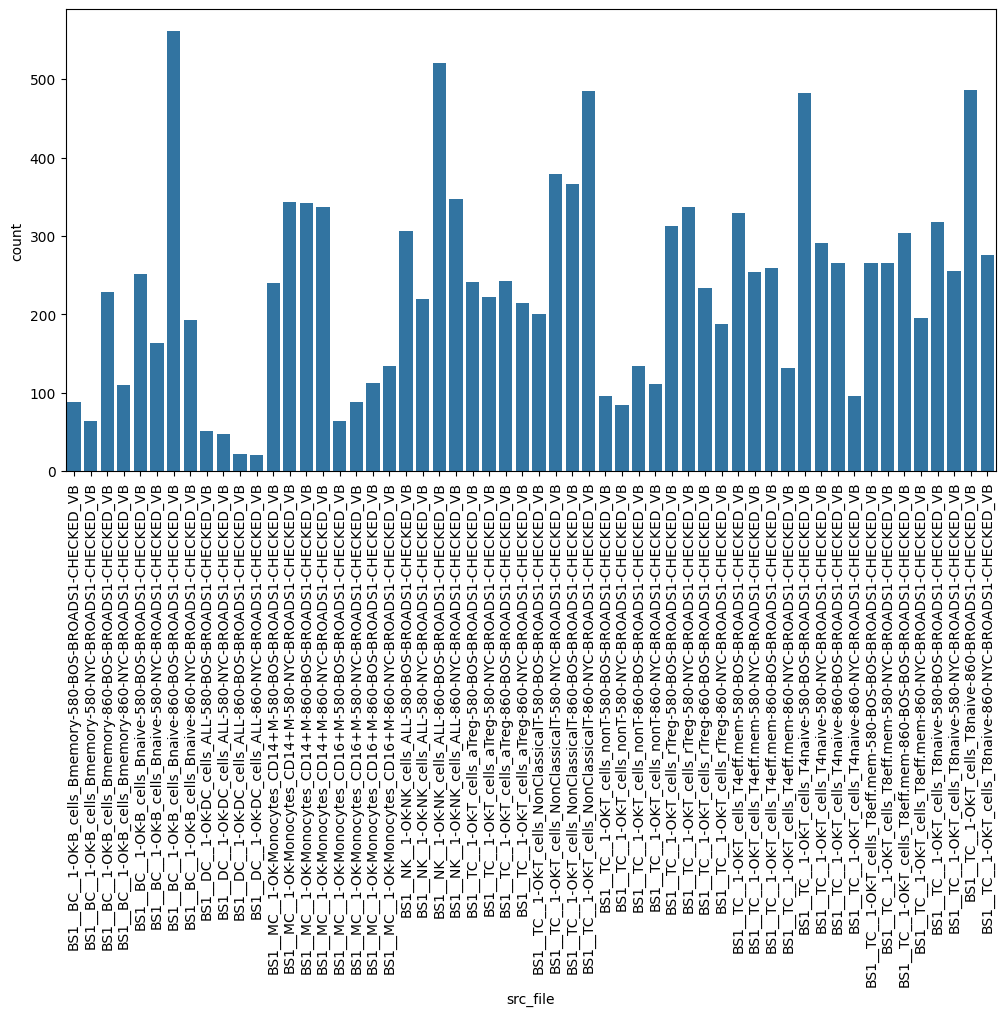

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='src_file', data=data1)
plt.xticks(rotation=90)
plt.show()



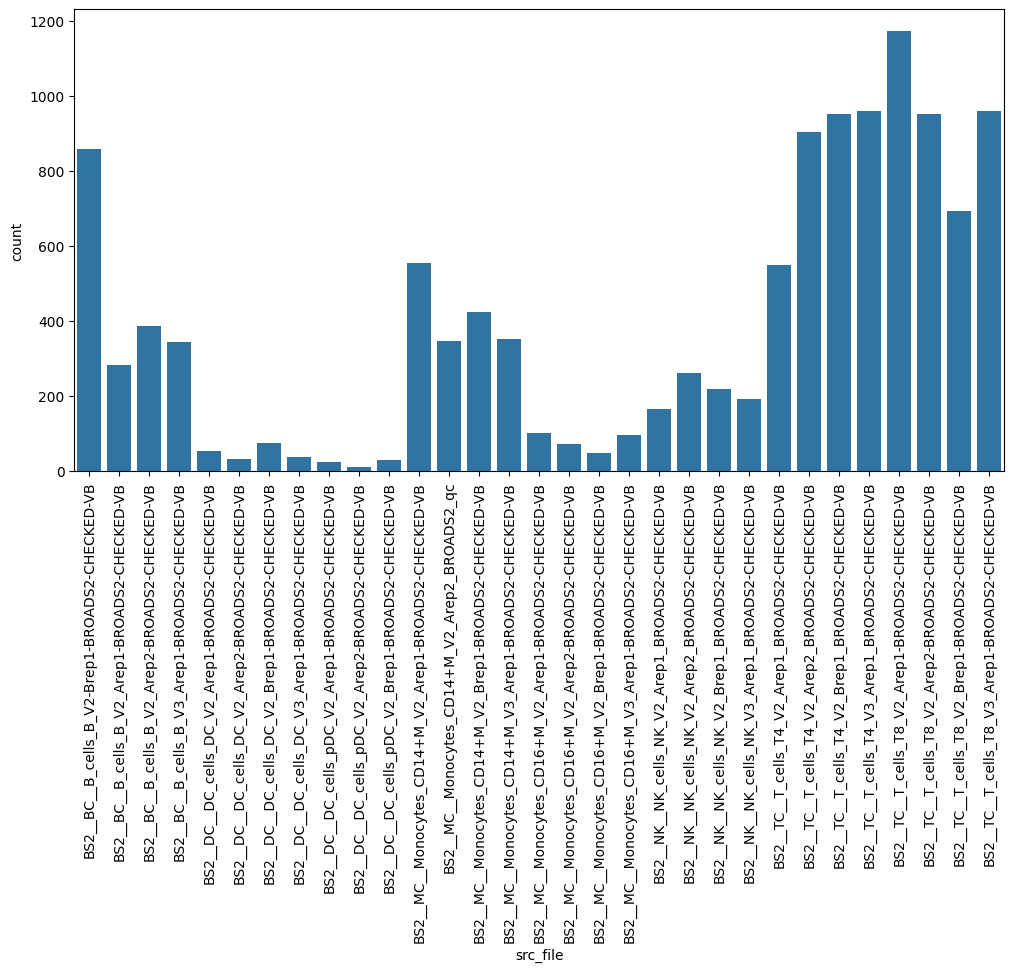

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='src_file', data=data2)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Izdvajanje tipa ćelije iz naziva datoteke i dodavanje nove kolone 
data1['cells_type'] = data1['src_file'].str.extract(r'__(\w+?)__')
data2['cells_type'] = data2['src_file'].str.extract(r'__(\w+?)__')

#Provera broja celija po tipu
counts1 = data1['cells_type'].value_counts()
counts2 = data2['cells_type'].value_counts()
print(counts1)
print(counts2)

cells_type
TC    8326
MC    1661
BC    1660
NK    1394
DC     142
Name: count, dtype: int64
cells_type
TC    7151
MC    2006
BC    1877
NK     842
DC     270
Name: count, dtype: int64


In [54]:
from sklearn.manifold import TSNE

X1= data1.drop(['src_file', 'row_id', 'cells_type'], axis=1)  # Uklanja ne-numeričke kolone

tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X1)


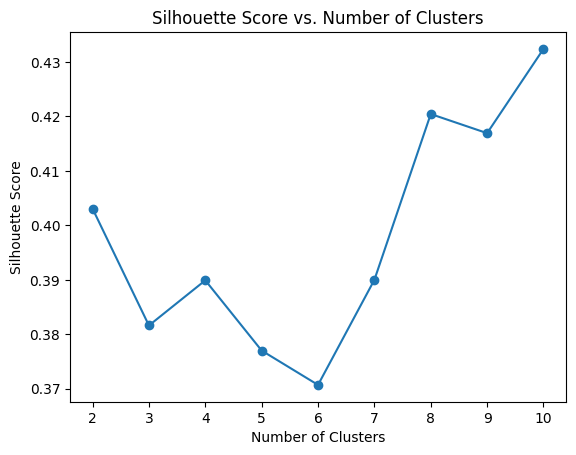

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista za čuvanje vrednosti Silhouette Score
silhouette_scores = []

# Iteracija kroz broj klastera od 2 do 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Prikaz rezultata na grafikonu
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [57]:
from umap import UMAP

# Kreiranje UMAP reduktora bez random_state za maksimalnu paralelizaciju
#umap_reducer = UMAP(n_components=2, n_jobs=-1)  # n_jobs=-1 koristi sve dostupne procesorske niti

# Koristi umap_reducer na tvojim podacima
#X_reduced = umap_reducer.fit_transform(X1)


umap_reducer = UMAP(n_components=2, n_neighbors=10, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X1)


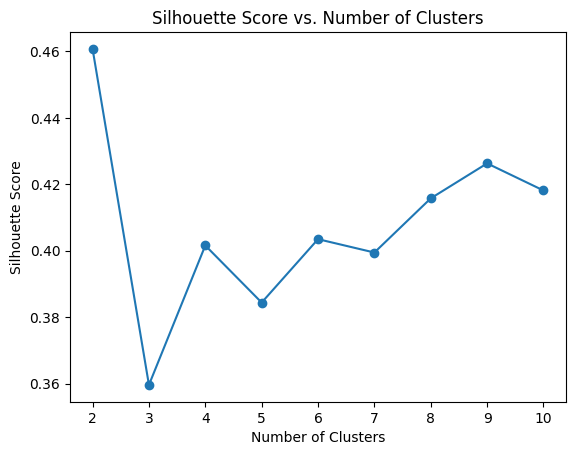

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista za čuvanje vrednosti Silhouette Score
silhouette_scores = []

# Iteracija kroz broj klastera od 2 do 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Prikaz rezultata na grafikonu
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


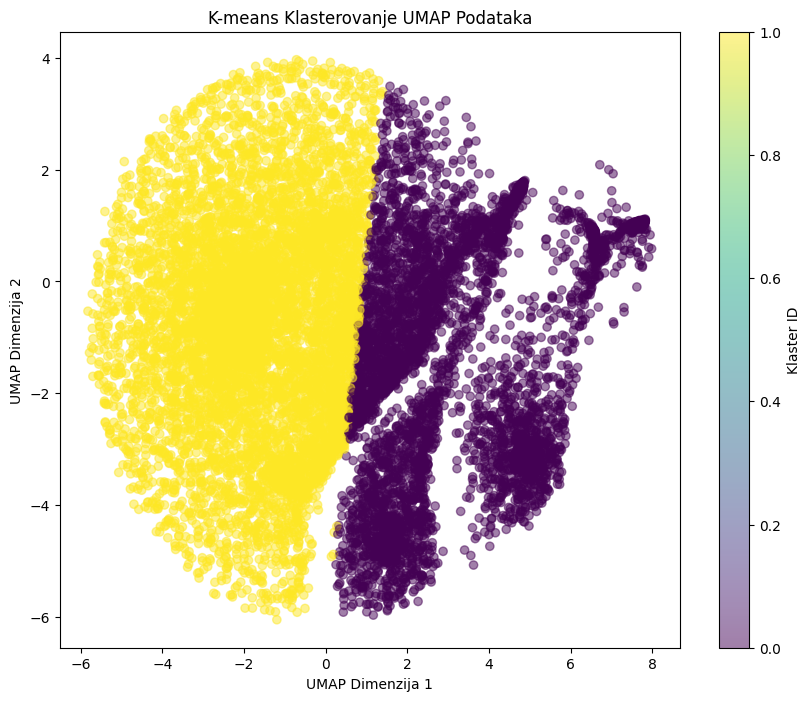

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)  # Pretpostavlja se da želiš 5 klastera
clusters = kmeans.fit_predict(X_reduced)

# Vizualizacija klastera
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Klasterovanje UMAP Podataka')
plt.xlabel('UMAP Dimenzija 1')
plt.ylabel('UMAP Dimenzija 2')
plt.colorbar(label='Klaster ID')
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_reduced, clusters)
print("Silhouette Score: ", silhouette_avg)


Silhouette Score:  0.4224788


Adjusted Rand Index: 0.2774757294808477
Predicted     0     1     2     3     4
Actual                                 
BC         1529     5   113     5     8
DC            0     0   142     0     0
MC            2     5  1642     1    11
NK          241   196    92     8   857
TC          377  3036   151  2814  1948


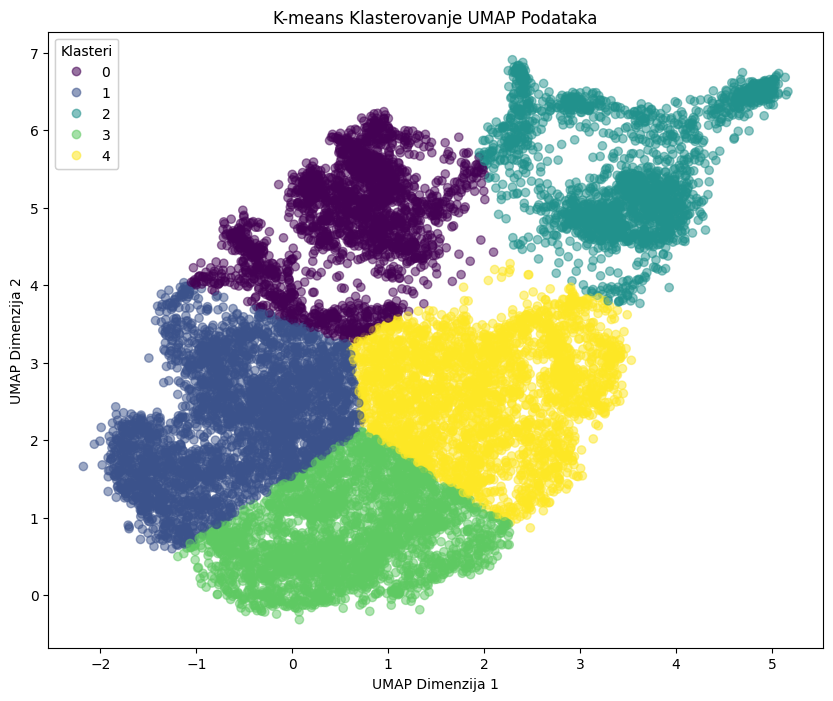

In [32]:
from sklearn.metrics import adjusted_rand_score

# Pretpostavljamo da su 'clusters' tvoji klasteri dobijeni iz K-means
ari_score = adjusted_rand_score(data1['cells_type'], clusters)
print("Adjusted Rand Index:", ari_score)

import pandas as pd

conf_matrix = pd.crosstab(data1['cells_type'], clusters, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Klasterovanje UMAP Podataka')
plt.xlabel('UMAP Dimenzija 1')
plt.ylabel('UMAP Dimenzija 2')
legend1 = plt.legend(*scatter.legend_elements(), title="Klasteri")
plt.gca().add_artist(legend1)
plt.show()


In [ ]:
#BC ćelije su pretežno grupisane u jednom klasteru (0), sa malim brojem ćelija u drugim klasterima. Ovo sugeriše dobro grupisanje za BC ćelije.
#DC ćelije su savršeno grupisane u klasteru 2, što ukazuje na izuzetno precizno klasterovanje za ovaj tip ćelija.
#MC ćelije su takođe većinom grupisane u klasteru 2, sa vrlo malim brojem ćelija u drugim klasterima, što ukazuje na dobro klasterovanje.
#NK ćelije su raznoliko distribuirane, sa velikom koncentracijom u klasteru 4 i značajnim brojem u klasterima 0 i 1. Ovo može ukazivati na to da NK ćelije pokazuju heterogenost u izražavanju gena ili su slične nekim TC ćelijama.
#TC ćelije pokazuju veliku heterogenost u distribuciji preko više klastera (1, 3, 4), što može reflektovati unutrašnju biološku različitost unutar ovog tipa ćelija.

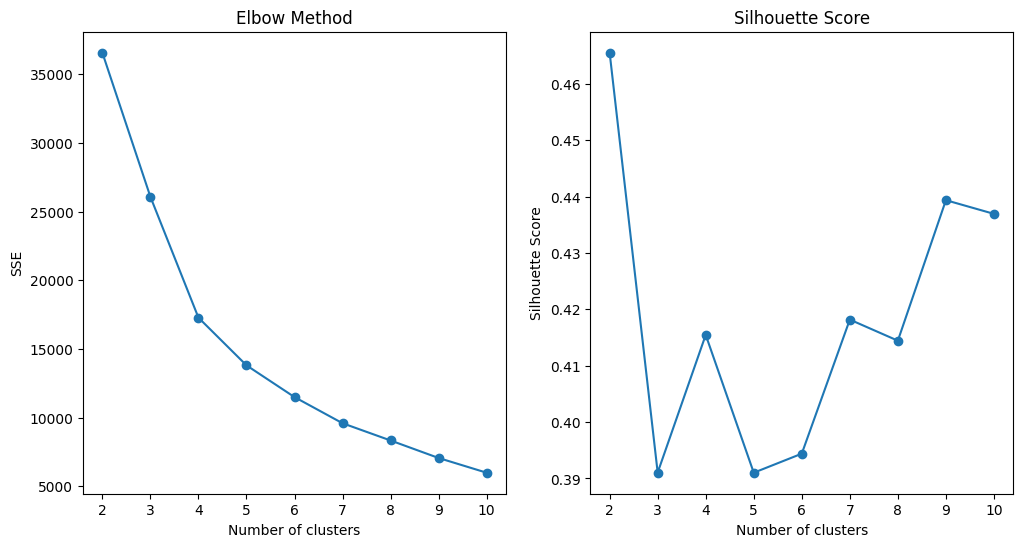

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Podaci su već redukovani koristeći UMAP
X_reduced = umap_reducer.fit_transform(X1)

# Pokušajmo da nađemo optimalan broj klastera
sse = []
silhouette_coeff = []
for k in range(2, 11):  # Razmatramo broj klastera od 2 do 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    sse.append(kmeans.inertia_)
    silhouette_coeff.append(silhouette_score(X_reduced, kmeans.labels_))

# Crtanje Elbow grafika
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

# Crtanje Silhouette grafika
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_coeff, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

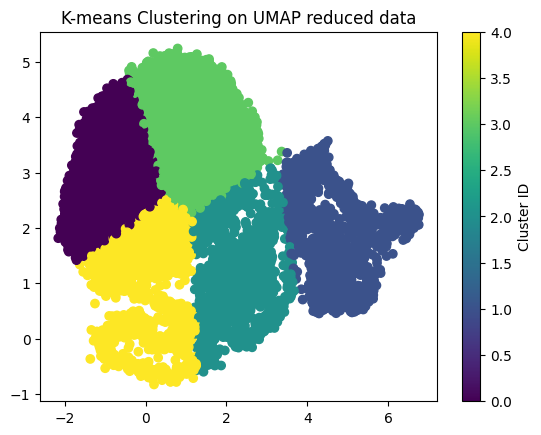

Adjusted Rand Index: 0.28516642557025246
Predicted     0     1     2     3     4
Actual                                 
BC            6   135  1513     1     5
DC            0   141     1     0     0
MC            3  1644    11     0     3
NK            1   208   428    10   747
TC         3073   160   429  2960  1704


In [34]:
# Pretpostavimo da optimalan broj klastera jeste 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# Vizualizacija klastera
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering on UMAP reduced data')
plt.colorbar(label='Cluster ID')
plt.show()

# Evaluacija pomoću Adjusted Rand Index
ari_score = adjusted_rand_score(data1['cells_type'], clusters)
print("Adjusted Rand Index:", ari_score)

# Confusion matrix za upoređivanje stvarnih tipova ćelija i klastera
conf_matrix = pd.crosstab(data1['cells_type'], clusters, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)


In [35]:
# K-means sa 2 klastera
kmeans_2 = KMeans(n_clusters=2, random_state=0)
clusters_2 = kmeans_2.fit_predict(X_reduced)
silhouette_2 = silhouette_score(X_reduced, clusters_2)

# K-means sa 4 klastera
kmeans_4 = KMeans(n_clusters=4, random_state=0)
clusters_4 = kmeans_4.fit_predict(X_reduced)
silhouette_4 = silhouette_score(X_reduced, clusters_4)

print(f"Silhouette Score sa 2 klastera: {silhouette_2}")
print(f"Silhouette Score sa 4 klastera: {silhouette_4}")


Silhouette Score sa 2 klastera: 0.46551603078842163
Silhouette Score sa 4 klastera: 0.4174693822860718


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Ponovno pokretanje DBSCAN-a sa moguće novim parametrima
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ovo su samo početne vrednosti
clusters = dbscan.fit_predict(X_reduced)

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Broj klastera: {n_clusters}')
print(f'Broj šum tačaka: {n_noise}')

# Evaluacija klasterovanja koristeći Silhouette Score, ako ima smisla izračunati
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_reduced, clusters)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette Score nije izračunat zbog nedostatka klastera ili samo jednog klastera.")


Broj klastera: 1
Broj šum tačaka: 0
Silhouette Score nije izračunat zbog nedostatka klastera ili samo jednog klastera.


eps=0.10: Broj klastera: 17, Broj šum tačaka: 196
eps=0.12: Broj klastera: 9, Broj šum tačaka: 64
eps=0.15: Broj klastera: 3, Broj šum tačaka: 27
eps=0.18: Broj klastera: 1, Broj šum tačaka: 8
eps=0.20: Broj klastera: 1, Broj šum tačaka: 6


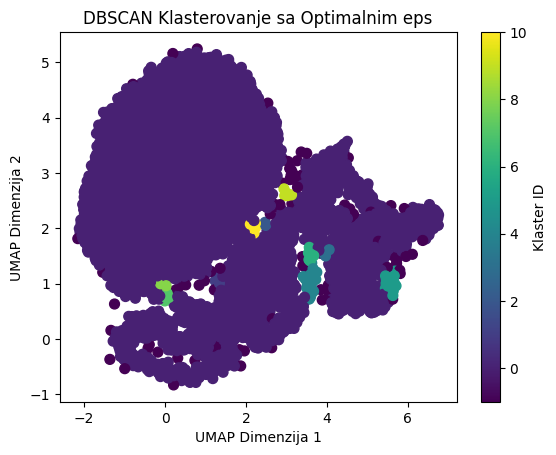

In [45]:
for eps in np.linspace(0.1, 0.2, num=5):  # Fino podešavanje unutar opsega
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_reduced)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    print(f'eps={eps:.2f}: Broj klastera: {n_clusters}, Broj šum tačaka: {n_noise}')
# Koristi optimalni eps nakon isprobavanja
optimal_eps = 0.15  # Primer optimalne vrednosti
dbscan = DBSCAN(eps=0.12, min_samples=5)
clusters = dbscan.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBSCAN Klasterovanje sa Optimalnim eps')
plt.xlabel('UMAP Dimenzija 1')
plt.ylabel('UMAP Dimenzija 2')
plt.colorbar(label='Klaster ID')
plt.show()


In [65]:
X1 = data1.drop(['src_file', 'row_id', 'cells_type'], axis=1)  

# Kreiranje UMAP reduktora
umap_reducer = UMAP(n_components=10, n_neighbors=15, min_dist=0.1, n_jobs=1, random_state=42)

# UMAP redukcija
X1_umap = umap_reducer.fit_transform(X1)

In [12]:
#Potrebno je osigurati da setovi podataka koje koristite za treniranje i testiranje (fit i transform) imaju identične kolone u istom redosledu
print(set(data1.columns) - set(data2.columns))
print(set(data2.columns) - set(data1.columns))

{'hg38_RP5-921G16.1', 'hg38_ETHE1', 'hg38_KDM2B'}
{'hg38_KDM2', 'hg38_R5-921G16.1', 'hg3_ETHE1'}


In [13]:


# Mapiranje neusaglašenih imena kolona iz data2 u data1
rename_columns = {
    'hg38_R5-921G16.1': 'hg38_RP5-921G16.1',
    'hg38_KDM2': 'hg38_KDM2B',
    'hg3_ETHE1': 'hg38_ETHE1'
}

# Primena preimenovanja na data2
data2.rename(columns=rename_columns, inplace=True)


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Isključivanje ne-numeričkih i identifikacionih kolona
X1 = data1.drop(['src_file', 'row_id', 'cells_type'], axis=1)
X2 = data2.drop(['src_file', 'row_id', 'cells_type'], axis=1)

# Primena StandardScaler za normalizaciju
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)
X2_normalized = scaler.transform(X2)  # Koristimo isti scaler kako bi održali konzistentnost

# Pretvaranje nazad u DataFrame za lakše rukovanje dalje
X1_normalized = pd.DataFrame(X1_normalized, columns=X1.columns)
X2_normalized = pd.DataFrame(X2_normalized, columns=X2.columns)


In [39]:
import umap
import matplotlib.pyplot as plt

# Konfiguracija UMAP
#reducer = umap.UMAP(random_state=42)
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
X1_reduced = reducer.fit_transform(X1_normalized)

C:\Users\MilosMikovic\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


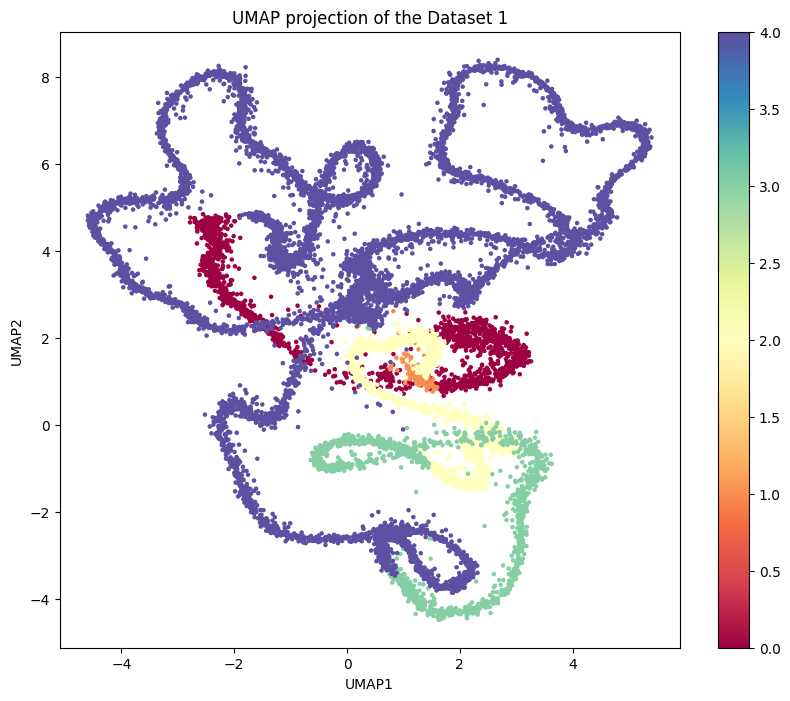

In [40]:
# Vizualizacija rezultata UMAP
plt.figure(figsize=(10, 8))
plt.scatter(X1_reduced[:, 0], X1_reduced[:, 1], c=data1['cells_type'].astype('category').cat.codes, cmap='Spectral', s=5)
plt.colorbar()
plt.title('UMAP projection of the Dataset 1')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

Silhouette Score for 2 clusters: 0.42934703826904297
Silhouette Score for 3 clusters: 0.40617066621780396
Silhouette Score for 4 clusters: 0.42704179883003235
Silhouette Score for 5 clusters: 0.42709892988204956
Silhouette Score for 6 clusters: 0.4122340977191925
Silhouette Score for 7 clusters: 0.4209299087524414
Silhouette Score for 8 clusters: 0.40924227237701416
Silhouette Score for 9 clusters: 0.4101666808128357
Silhouette Score for 10 clusters: 0.4179302155971527


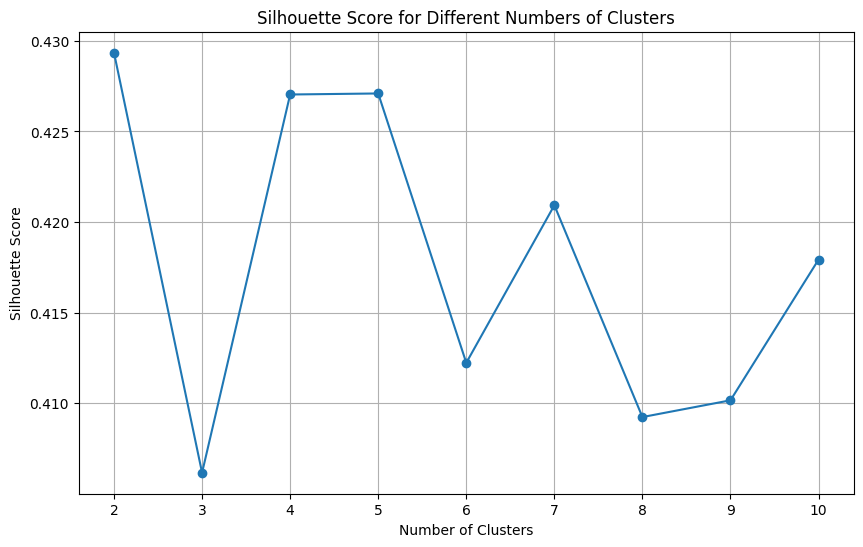

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Inicijalizacija liste za čuvanje Silhouette skorova
silhouette_scores = []

# Testiranje različitih brojeva klastera od 2 do 10
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X1_reduced)
    
    # Evaluacija klasterovanja pomoću Silhouette skora
    score = silhouette_score(X1_reduced, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")

# Vizualizacija Silhouette skorova za različite brojeve klastera
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


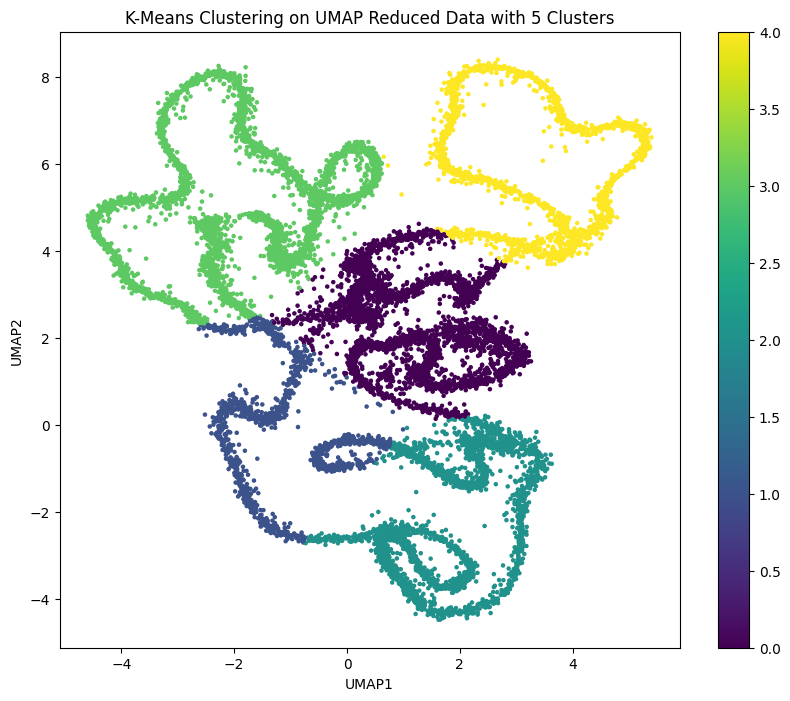

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Izvođenje k-means klasterovanja
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X1_reduced)  # Pretpostavlja se da je X1_reduced već generisan UMAP

# Vizualizacija klastera
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X1_reduced[:, 0], X1_reduced[:, 1], c=clusters, cmap='viridis', s=5)
plt.colorbar(scatter)
plt.title('K-Means Clustering on UMAP Reduced Data with 5 Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


In [43]:
# Pretpostavimo da 'cells_type' sadrži biološke oznake
pd.crosstab(data1['Cluster'], data1['cells_type'])


cells_type,BC,DC,MC,NK,TC
Cluster,,,,,
0,930,142,892,2,1603
1,124,0,0,418,801
2,0,0,769,974,1049
3,606,0,0,0,3021
4,0,0,0,0,1852


In [33]:
# Mogući opsezi za eps i min_samples
eps_values = np.arange(0.0, 2.0, 0.1)  # Može se fino podešavati
min_samples_values = range(3, 10)  # Broj minimalnih uzoraka u okolini


Best eps: 0.30000000000000004, Best min_samples: 6, Best Silhouette Score: 0.061081770807504654


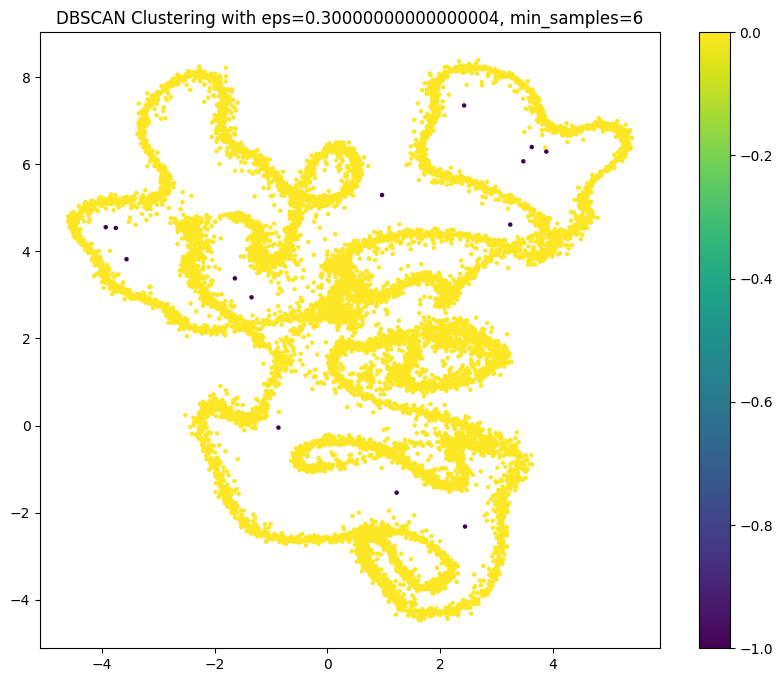

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Rezultati za svaku kombinaciju
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X1_reduced)
        if len(np.unique(labels)) > 1:  # Ako postoji više od jednog klastera (ignorišemo slučaj sa samo šumom)
            silhouette = silhouette_score(X1_reduced, labels)
            results.append((eps, min_samples, silhouette, labels))

# Sortiramo rezultate prema Silhouette skoru
results.sort(key=lambda x: x[2], reverse=True)

# Prikazujemo najbolji rezultat
best_eps, best_min_samples, best_silhouette, best_labels = results[0]
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette}")

# Vizualizacija najboljeg klasterovanja
plt.figure(figsize=(10, 8))
plt.scatter(X1_reduced[:, 0], X1_reduced[:, 1], c=best_labels, cmap='viridis', s=5)
plt.title(f'DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.colorbar()
plt.show()
